In [1]:
from loaddata import LoadDataset, LoadDataset_scar, ProcessTestDataset
import numpy as np
import nibabel as nib
import torch
from scipy import stats
from torch import nn
import scipy.ndimage as ndimage
from function import compute_sdf
import kornia
from function import F_DistTransform
from scipy.special import expit, logit
from skimage.exposure import match_histograms
import numpy as np
import nibabel as nib
import torch
from scipy import stats
from torch import nn
import scipy.ndimage as ndimage
from function import compute_sdf
import kornia
from function import F_DistTransform
from scipy.special import expit, logit
from skimage.exposure import match_histograms
from loaddata import F_nifity_imageCrop

In [2]:
import SimpleITK as sitk
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:
datafile='/home/ytsun/Johnson/git_John/AtrialJSQnet/LAScarQS2022_Task1/train_data/train_1'
imagename = datafile + '/enhanced.nii.gz'
LAlabelname = datafile + '/atriumSegImgMO.nii.gz'
LAscarMaplabelname = datafile + '/scarSegImgM.nii.gz'

print('loading training image: ' + imagename) 
numpyimage, numpylabel_LA, numpylabel_LAdist, numpyprob_normal, numpyprob_scar = LoadDataset_scar(imagename, LAlabelname, LAscarMaplabelname)


loading training image: /home/ytsun/Johnson/git_John/AtrialJSQnet/LAScarQS2022_Task1/train_data/train_1/enhanced.nii.gz


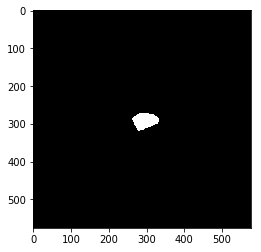

In [42]:
img=sitk.ReadImage(LAlabelname)
arr=sitk.GetArrayFromImage(img)
arr.shape
plt.imshow(arr[14,:,:],'gray')

In [67]:
imagename = datafile + '/enhanced.nii.gz'
LAlabelname = datafile + '/atriumSegImgMO.nii.gz'
LAscarMaplabelname = datafile + '/scarSegImgM.nii.gz'

niblabel = nib.load(LAlabelname)
labeldata = niblabel.get_data()
print(labeldata.shape)
numpylabel = np.array(labeldata).squeeze()
print(numpylabel.shape)
center_numpylabel = numpylabel[:, :, int(numpylabel.shape[2] / 2)]
print(center_numpylabel.shape)
center_coord = np.floor(np.mean(np.stack(np.where(center_numpylabel > 0)), -1)).astype(np.int16)
print(center_coord.shape)
print(center_coord)#centerpoint coordinate
numpylabel_crop = F_nifity_imageCrop(numpylabel, center_coord)
print(numpylabel_crop.shape)

(576, 576, 44)
(576, 576, 44)
(576, 576)
(2,)
[310 283]
(192, 192, 64)


/home/ytsun/anaconda3/envs/laseg/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


/home/ytsun/anaconda3/envs/laseg/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


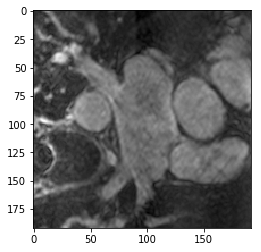

In [77]:
nibimage = nib.load(imagename)
imagedata = nibimage.get_data()
#plt.imshow(imagedata[:,:,5],'gray')
numpyimage = np.array(imagedata).squeeze()
numpyimage_crop = F_nifity_imageCrop(numpyimage, center_coord)  # crop image
numpyimage_crop_processed = np.nan_to_num(stats.zscore(numpyimage_crop))
numpyimage_crop_processed.shape
plt.imshow(numpyimage_crop_processed[:,:,25],'gray')

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


/home/ytsun/anaconda3/envs/laseg/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


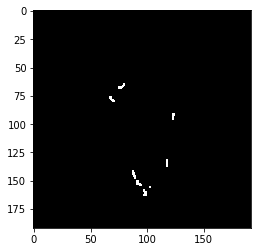

In [88]:
nibscarlabel = nib.load(LAscarMaplabelname)
scarlabeldata = nibscarlabel.get_data()
numpyscarlabel = np.array(scarlabeldata).squeeze()
numpyscarlabel_crop = F_nifity_imageCrop(numpyscarlabel,center_coord)#(192, 192, 64)
#print('numpyscarlabel_crop',numpyscarlabel_crop.shape)
numpyscarlabel_crop.shape
plt.imshow(numpyscarlabel_crop[:,:,25],'gray')

(192, 192, 64)
(192, 192, 64)


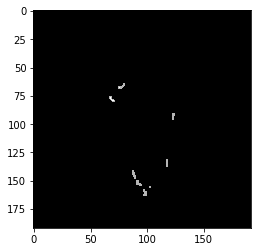

In [93]:

numpylabel_crop_new = np.expand_dims(numpylabel_crop, 0)
numpylabel_crop_new = np.expand_dims(numpylabel_crop_new, 0)
numpylabel_crop_new = (numpylabel_crop_new>0)*1
gt_dis = compute_sdf(numpylabel_crop_new, numpylabel_crop_new.shape)
#print('gt_dis',gt_dis.shape)
gt_LA_dis = np.squeeze(gt_dis, axis=1)

#gt_dis_normal = F_DistTransform(numpyscarlabel_crop==421)
gt_dis_normal = F_DistTransform(numpyscarlabel_crop==0)
print(gt_dis_normal.shape)
plt.imshow(gt_dis_normal[:,:,25],'gray')
#print('gt_dis_normal type:',type(gt_dis_normal))
gt_dis_scar = F_DistTransform(numpyscarlabel_crop==1)
print(gt_dis_scar.shape)
#plt.imshow(gt_dis_scar[:,:,25],'gray')
gt_dis_normal, gt_dis_scar = np.expand_dims(gt_dis_normal, 0), np.expand_dims(gt_dis_scar, 0)
# m = 10
# gt_dis_normal, gt_dis_scar = m**(-gt_dis_normal), m**(-gt_dis_scar)
gt_dis_normal, gt_dis_scar = np.exp(-gt_dis_normal), np.exp(-gt_dis_scar)

In [3]:
import torch.utils.data as data
class TrainingDataset(data.Dataset):
    def __init__(self, datapath):

        self.numpyimage = []
        self.numpylabel_LA = []
        self.numpylabel_LAdist = []
        self.numpyprob_normal = []
        self.numpyprob_scar = []
        self.numpyprob_background = []
        self.NumOfSubjects = 0

        self.datafile = glob.glob(datapath + '/*')
        for subjectid in range(len(self.datafile)):
            #if subjectid > 1:
            #     break     
            imagename = self.datafile[subjectid] + '/enhanced.nii.gz'
            LAlabelname = self.datafile[subjectid] + '/atriumSegImgMO.nii.gz'
            LAscarMaplabelname = self.datafile[subjectid] + '/scarSegImgM.nii.gz'
            
            print('loading training image: ' + imagename) 
            
            numpyimage, numpylabel_LA, numpylabel_LAdist, numpyprob_normal, numpyprob_scar = LoadDataset_scar(imagename, LAlabelname, LAscarMaplabelname)
            self.numpyimage.extend(numpyimage)
            self.numpylabel_LA.extend(numpylabel_LA)
            self.numpylabel_LAdist.extend(numpylabel_LAdist)
            # self.numpyprob_background.extend(numpy2Dbackgroundprob)
            self.numpyprob_normal.extend(numpyprob_normal)
            self.numpyprob_scar.extend(numpyprob_scar)
            self.NumOfSubjects += 1

    def __getitem__(self, item):
        numpyimage = np.array([self.numpyimage[item]])
        numpylabel_LA = np.array([self.numpylabel_LA[item]])
        numpylabel_LA = (numpylabel_LA > 0) * 1
        numpylabel_LAdist = np.array([self.numpylabel_LAdist[item]])
        # numpyprob_background = np.array([self.numpyprob_background[item]])
        numpyprob_normal = np.array([self.numpyprob_normal[item]])
        numpyprob_scar = np.array([self.numpyprob_scar[item]])

        tensorimage = torch.from_numpy(numpyimage).float()
        tensorlabel_LA = torch.from_numpy(numpylabel_LA.astype(np.float32))
        tensorlabel_LAdist = torch.from_numpy(numpylabel_LAdist.astype(np.float32))
        # tensorprob_background = torch.from_numpy(numpyprob_background.astype(np.float32))
        tensorprob_normal = torch.from_numpy(numpyprob_normal.astype(np.float32))
        tensorprob_scar = torch.from_numpy(numpyprob_scar.astype(np.float32))

        return tensorimage, tensorlabel_LA, tensorlabel_LAdist, tensorprob_normal, tensorprob_scar

    def __len__(self):
        return self.NumOfSubjects


In [4]:
from torch.utils.data import DataLoader
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
Root_DIR='/home/ytsun/Johnson/git_John/AtrialJSQnet/'
TRAIN_DIR_PATH = Root_DIR + 'LAScarQS2022_Task1/test_data/'
dataset = TrainingDataset(TRAIN_DIR_PATH)
data_loader = DataLoader(dataset,batch_size=1)


loading training image: /home/ytsun/Johnson/git_John/AtrialJSQnet/LAScarQS2022_Task1/test_data/train_31/enhanced.nii.gz
loading training image: /home/ytsun/Johnson/git_John/AtrialJSQnet/LAScarQS2022_Task1/test_data/train_1/enhanced.nii.gz
loading training image: /home/ytsun/Johnson/git_John/AtrialJSQnet/LAScarQS2022_Task1/test_data/train_41/enhanced.nii.gz
loading training image: /home/ytsun/Johnson/git_John/AtrialJSQnet/LAScarQS2022_Task1/test_data/train_51/enhanced.nii.gz
loading training image: /home/ytsun/Johnson/git_John/AtrialJSQnet/LAScarQS2022_Task1/test_data/train_21/enhanced.nii.gz
loading training image: /home/ytsun/Johnson/git_John/AtrialJSQnet/LAScarQS2022_Task1/test_data/train_11/enhanced.nii.gz


In [5]:
from torch import optim
from torch.backends import cudnn
from network import Seg_3DNet, Seg_3DNet_2task
from function import F_loss, F_LoadParam_test, F_loss_SDM, F_loss_scar, F_LoadParam, F_mkdir
resume_path='/home/ytsun/Johnson/git_John/AtrialJSQnet/Script_AJSQnet/result_model/net_with_490.pkl'
net = Seg_3DNet_2task(1, 1).to(device)
net.load_state_dict(torch.load(resume_path))
cudnn.benchmark = True
optimizer = optim.Adam(net.parameters())
epoch=100
for i, (lgeimage, lgelabel, lgedist, lgeprob_normal, lgeprob_scar) in enumerate(data_loader):
    #for param_group in optimizer.param_groups:
     #   param_group['lr'] = flearning_rate
    lgeimage, lgelabel, lgedist, lgeprob_normal, lgeprob_scar = lgeimage.to(device), lgelabel.to(device), lgedist.to(device), lgeprob_normal.to(device), lgeprob_scar.to(device)
    # lgeprob_background = lgeprob_background.to(device)
    optimizer.zero_grad()
    
    output = net(lgeimage)

    loss_la, loss_sdf_la, loss_scar, loss_scar_m1, loss_scar_m2 = F_loss_scar(output, lgelabel, lgedist, lgeprob_normal, lgeprob_scar)
    weight_sdm = 1e-2*(1.05**(epoch//10))
    weight_scar = 1e-2*(1.05**(epoch//10))
    break
    loss = loss_la + weight_sdm*loss_sdf_la + 10*loss_scar  #+ 0.01*loss_scar_m1 + 0.01*loss_scar_m2
    
#mask_gd = ((prob_normal > 0.45) * (prob_normal < 0.5)).float() + ((prob_scar > 0.45) * (prob_scar < 0.5)).float()

In [29]:
output, label, LAdist, prob_normal, prob_scar=output, lgelabel, lgedist, lgeprob_normal, lgeprob_scar
out_LA, out_scar = output 
lossfunc1 = nn.BCELoss().to(device)
loss_la = lossfunc1(out_LA, label)
print(loss_la)
loss_sdf_la = torch.mean(((out_LA-0.5)*LAdist))

lossfunc2 = nn.MSELoss().to(device)
gt_scar_probmap = torch.cat((prob_normal, prob_scar), dim=1)

loss_scar = lossfunc2(out_scar, gt_scar_probmap)#F_hellinger_distance

lossfunc3 = nn.MSELoss(reduction='sum').to(device)#reduction=‘sum’: the output will be summed.

#mask_gd = ((prob_normal > 0.45) * (prob_normal < 0.5)).float() + ((prob_scar > 0.45) * (prob_scar < 0.5)).float()
#mask_gd = (torch.min(torch.abs(torch.logit(gt_scar_probmap)), dim=1)[0]==0).float()
mask_gd = (torch.min(-torch.log(gt_scar_probmap), dim=1)[0]==0).float()
# out_LA_gradient = kornia.sobel(((out_LA>0.5).float()))
#mask_pred = (out_LA_gradient>0.4).float()
mask_pred = ((out_LA > 0.1) * (out_LA < 0.8)).float()
print(torch.sum(mask_gd))
print(lossfunc3(mask_gd*(gt_scar_probmap[:, 0] - gt_scar_probmap[:, 1]), mask_gd*(out_scar[:, 0] - out_scar[:, 1])))
try:
    loss_scar_mask1 = lossfunc3(mask_gd*(gt_scar_probmap[:, 0] - gt_scar_probmap[:, 1]), mask_gd*(out_scar[:, 0] - out_scar[:, 1]))/torch.sum(mask_gd)
except:
    print(torch.sum(mask_gd))
loss_scar_mask2 = lossfunc3(mask_pred * (gt_scar_probmap[:, 0] - gt_scar_probmap[:, 1]), mask_pred * (out_scar[:, 0] - out_scar[:, 1])) / torch.sum(mask_pred)
print(loss_scar_mask1)
print(loss_scar_mask2)

tensor(0.0009, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(2359296., device='cuda:0')
tensor(2342424., device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.9928, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.8264, device='cuda:0', grad_fn=<DivBackward0>)


(1, 192, 192, 64)


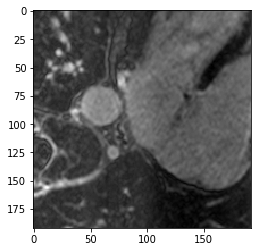

In [45]:
a,b,c,d,e=numpyimage, numpylabel_LA, numpylabel_LAdist, numpyprob_normal, numpyprob_scar
#print(a.shape,b.shape,c.shape,d.shape,e.shape)
#np.array(a).squeeze().shape
print(a.shape)
plt.imshow(np.array(a).squeeze()[:,:,14],'gray')

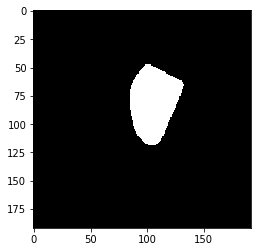

In [43]:
plt.imshow(np.array(b).squeeze()[:,:,14],'gray')

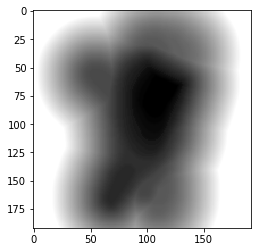

In [56]:
plt.imshow(np.array(c).squeeze()[:,:,14],'gray')
c_img=sitk.GetImageFromArray(np.array(c).squeeze())
export_path='/home/ytsun/Johnson/git_John/AtrialJSQnet/LAScarQS2022_Task1/numpylabel_LAdist.nii.gz'
sitk.WriteImage(c_img,export_path)

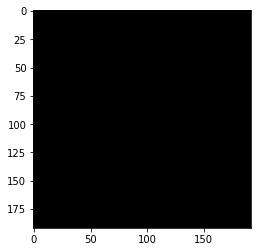

In [83]:
plt.imshow(np.array(d).squeeze()[:,:,24],'gray')
d_img=sitk.GetImageFromArray(np.array(d).squeeze())
export_path='/home/ytsun/Johnson/git_John/AtrialJSQnet/LAScarQS2022_Task1/numpyprob_normal.nii.gz'
sitk.WriteImage(d_img,export_path)

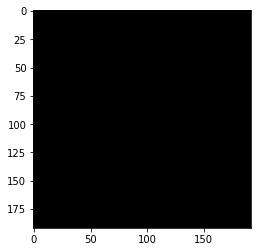

In [84]:
plt.imshow(np.array(e).squeeze()[:,:,25],'gray')
e_img=sitk.GetImageFromArray(np.array(e).squeeze())
export_path='/home/ytsun/Johnson/git_John/AtrialJSQnet/LAScarQS2022_Task1/numpyprob_scar.nii.gz'
sitk.WriteImage(e_img,export_path)